testing the dataset

To load the dataset stored in google drive, the dataset must be mounted in Google Colab.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


import the necessary packages and define transformations

In [ ]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
# Define transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

Graphics Preprocessing Units (GPU) for faster processing of intensive high-resolution images and graphics

In [ ]:
# Setup device-agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

making the csv file for the new dataset, it take the new image that stored in the folder "test" in the drive and make the excel sheet for it to use it later in the testing.


In [ ]:
import openpyxl
from openpyxl.drawing.image import Image
import os
from PIL import Image as PilImage  # To resize images if necessary

# Define the folder where images are stored
image_folder = "/content/drive/My Drive/Colab Notebooks/testdateset/test/"


# Create a new Excel workbook and add a worksheet
workbook = openpyxl.Workbook()
sheet = workbook.active
sheet.title = "Images"

# Function to resize images if they're too large
def resize_image(img_path, max_size=(128, 128)):
    img = PilImage.open(img_path)
    img.thumbnail(max_size)
    resized_path = img_path.replace(".", "_resized.")
    img.save(resized_path)
    return resized_path

# Loop through images in the folder and add them to the Excel sheet
row = 1
for filename in os.listdir(image_folder):
    if filename.endswith((".png", ".jpg", ".jpeg")):
        img_path = os.path.join(image_folder, filename)

        # Optionally resize the image
        resized_img_path = resize_image(img_path)

        # Load image and insert it into the sheet
        img = Image(resized_img_path)
        sheet.add_image(img, f"A{row}")

        # Move to the next row
        row += 10  # Adjust row spacing as needed

# Save the workbook
workbook.save("/content/drive/My Drive/Colab Notebooks/Test.csv")
print("Excel file created with images!")


Excel file created with images!


load the pre-trained model and define image preprocessing function,Define the Emotion Classification Function and Classify a New Image

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
from PIL import Image
import torchvision.transforms as transforms


# ... (Load pre-trained model) ...
model = models.resnet18(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 5)  # Assuming 5 emotion classes

# Define preprocess_image function
def preprocess_image(image_path):
    """Preprocesses an image for the model."""
    img = Image.open(image_path).convert('RGB')
    transform = transforms.Compose([
        transforms.Resize((128, 128)),  # Resize to the model's input size
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5])  # Normalize image
    ])
    return transform(img).unsqueeze(0)  # Add batch dimension

# Function to classify emotion as negative or non-negative
def classify_emotion(image_path):
    input_image = preprocess_image(image_path)
    with torch.no_grad():
        output = model(input_image)
        _, predicted_class = torch.max(output, 1)

    # Assuming your negative emotions are anger, and sad (indices  0,1)
    negative_emotions = [0,1]

    if predicted_class.item() in negative_emotions:
        return "Negative"
    else:
        return "Non-Negative"

# Path to your new image
new_image_path = '/content/drive/My Drive/Colab Notebooks/testdateset/test/im1540.png'

# Classify the emotion
emotion_type = classify_emotion(new_image_path)

print(f"Emotion type: {emotion_type}")

Emotion type: Non-Negative


print the tested image.

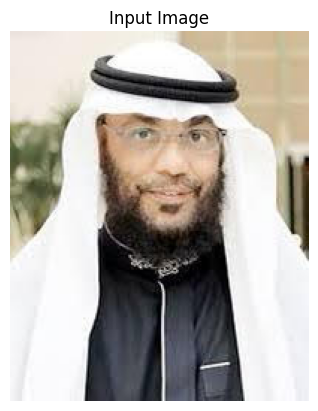

Emotion type: Non-Negative


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
from PIL import Image
import torchvision.transforms as transforms
import os
import matplotlib.pyplot as plt # Import matplotlib


# ... (Load pre-trained model) ...
# ... (classify_emotion and preprocess_image functions) ...


# Path to your new image
new_image_path = '/content/drive/My Drive/Colab Notebooks/testdateset/test/im1540.png'

# Check if the file exists
if not os.path.exists(new_image_path):
    print(f"Error: File not found at {new_image_path}")
else:
    # Display the image
    img = Image.open(new_image_path)
    plt.imshow(img)
    plt.title("Input Image")
    plt.axis('off')  # Hide axes
    plt.show()

    # Classify the emotion
    emotion_type = classify_emotion(new_image_path)

    print(f"Emotion type: {emotion_type}")